# Capstone Project 2 - Milestone Report

This report explains what is the problem being solved and how it has been handled so far. 

## 1.Define the problem

As  a  credit  company,  it  is  important  to  know  beforehand  who  is  able  to  pay  their  loans  and   who  is  not.  The  goal  of  this  project is  to  build  a  statistical/machine  learning  model  to  figure  out   which  clients  are  able  to  honor  their  debt. 

> One of the most important drivers of macroeconomic conditions and systemic risk is consumer
> spending, the opportunities and risk exposures in consumer lending are equally outsized.1 For example,
> as a result of the recent financial crisis, the overall charge-off rate in all revolving consumer credit
> across all U.S.lending institutions reached 10.1% in the third quarter of 2009, far exceeding the average
> charge-off rate of 4.72% during 2003 to 2007. The large number of decisions involved in the consumer lending 
> business makes it necessary to rely on models and algorithms rather than human discretion, and to base such algorithmic
> decisions on “hard” information, e.g., characteristics contained in consumer credit
> files collected by credit bureau agencies. Models are typically used to generate numerical
> “scores” that summarize the creditworthiness of consumers. In addition, it is common for
> lending institutions and credit bureaus to create their own customized risk models based on
> private information about borrowers. The type of private information typically consist of
> both “within-account” as well as “across-account” data regarding customers’ past behavior.
> However, while such models are generally able to produce reasonably accurate ordinal measures, i.e., rankings, of consumer
> creditworthiness, these measures adjust only slowly over time and are relatively insensitive to changes in market conditions. > Given the apparent speed with which consumer credit can deteriorate, there is a clear need for more timely cardinal
> measures of credit risk by banks and regulators. [http://mitsloan.mit.edu/media/Lo_ConsumerCreditRiskModels.pdf]

## 2.Identify your client

The client is the credit company who will benefit from having a machine learning model that predicts which clients will honor their debt


## 3.Describe your data set, and how you cleaned/wrangled it

This is a sintetic dataset used in a take-home challenge from Nubank that I worked on before.

The dataset has 2 files: (1) train and (2) test

**Size:**
29 columns: 14 are numerical (float64); 15 are object
The test set is missing the target variable(column) named "default"

Train: 64.592 observations

Test: 35.000 observations


In order to clean the data set I have checked format and values accuracy on every variable individually, the tools I've used were boxplot and histogram. The outliers were evaluated and removed when necessary, as described in the notebook. After every variable analysis there is a takeaway on the actions performed. I've started with the numerical variables and then advanced to the object variables.
Due to the decisive role of missing data in the prediction performance, I've taken special care on considereing what to do at each step. Given the small size of the dataset, we probably should not opt for deleting either entire observations (rows) or variables (columns) containing missing values. We’re left with the option of either replacing missing values with a sensible values given the distribution of the data, e.g., the mean, median or mode. Finally, we could go with prediction. do multiple imputation using Hmisc. A more detailed perspective can be seen in the notebook.
I've also used pandas profiling report that gives a good overview of the data to complement the analysis.


## 4.List other potential data sets you could use

As this dataset is synthetic it is not possible to add new data, especially because there is a lot of intentionally misguided labels. For example in the states variable a few values are "xsd3ZdsI3356I3xMxZeiqQ==" and "sjJbkqJS7cXalHLBFA+EOQ==". Making it impossible to interpret.

## 5.Explain your initial findings

For this problem to be solved with this dataset , the wrangling and cleaning of the dataset is highly critical to the performance of the model.
Because, each variable had its own particularities that needed to be handled. And usually more than one alternative to decide where to take the variables, mainly this decisions were made regarding how to handle the missing values.
As much of the data levels has been changed, the decisions are weighted even more in the data itself.
My strategy was to extremely avoid loosing data, only delete when it could harm the model.

## 6.Capstone Project 2 notebook

### 6.1 Load data and libraries

In [1]:
# Import the necessaries libraries for the code
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Loading the files
train = pd.read_csv("D:/DADOS USUARIO/Documents/springboard/snd capstone project/puzzle_train_dataset.csv", header=0)
test = pd.read_csv("D:/DADOS USUARIO/Documents/springboard/snd capstone project/puzzle_test_dataset.csv", header=0)

### 6.2 Inspect variables

In [3]:
# Inspecting the variables (columns) in the train set
print("Number of columns:",len(train.columns))
train.columns

Number of columns: 29


Index(['ids', 'default', 'score_1', 'score_2', 'score_3', 'score_4', 'score_5',
       'score_6', 'risk_rate', 'amount_borrowed', 'borrowed_in_months',
       'credit_limit', 'reason', 'income', 'sign', 'gender',
       'facebook_profile', 'last_payment', 'end_last_loan', 'state', 'zip',
       'channel', 'job_name', 'real_state', 'ok_since', 'n_bankruptcies',
       'n_defaulted_loans', 'n_accounts', 'n_issues'],
      dtype='object')

In [4]:
# Inspecting the variables (columns) in the test set
print("Number of columns:",len(test.columns))
test.columns

Number of columns: 28


Index(['ids', 'score_1', 'score_2', 'score_3', 'score_4', 'score_5', 'score_6',
       'risk_rate', 'amount_borrowed', 'borrowed_in_months', 'credit_limit',
       'reason', 'income', 'sign', 'gender', 'facebook_profile',
       'last_payment', 'end_last_loan', 'state', 'zip', 'channel', 'job_name',
       'real_state', 'ok_since', 'n_bankruptcies', 'n_defaulted_loans',
       'n_accounts', 'n_issues'],
      dtype='object')

As we can see the dataset is divided in train and test sets. And both have the same variables except for the target variable "default" in the test set.
**For the data cleaning and wrangling we will append both sets** and later split again to perform the machine learing prediction.

In [5]:
# Adding the default variable in the test and adjusting the order
test['default'] = np.nan
cols = ['ids',
 'default',
 'score_1',
 'score_2',
 'score_3',
 'score_4',
 'score_5',
 'score_6',
 'risk_rate',
 'amount_borrowed',
 'borrowed_in_months',
 'credit_limit',
 'reason',
 'income',
 'sign',
 'gender',
 'facebook_profile',
 'last_payment',
 'end_last_loan',
 'state',
 'zip',
 'channel',
 'job_name',
 'real_state',
 'ok_since',
 'n_bankruptcies',
 'n_defaulted_loans',
 'n_accounts',
 'n_issues']
test = test[cols]
test.columns

Index(['ids', 'default', 'score_1', 'score_2', 'score_3', 'score_4', 'score_5',
       'score_6', 'risk_rate', 'amount_borrowed', 'borrowed_in_months',
       'credit_limit', 'reason', 'income', 'sign', 'gender',
       'facebook_profile', 'last_payment', 'end_last_loan', 'state', 'zip',
       'channel', 'job_name', 'real_state', 'ok_since', 'n_bankruptcies',
       'n_defaulted_loans', 'n_accounts', 'n_issues'],
      dtype='object')

In [6]:
# Appending train and test
data = train.append(test, ignore_index=True)
print(len(train), "+", len(test), "=", len(data))

64592 + 35000 = 99592


In [7]:
# Checking the appending performed
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99592 entries, 0 to 99591
Data columns (total 29 columns):
ids                   99592 non-null object
default               59966 non-null object
score_1               98399 non-null object
score_2               98399 non-null object
score_3               98399 non-null float64
score_4               99592 non-null float64
score_5               99592 non-null float64
score_6               99592 non-null float64
risk_rate             98399 non-null float64
amount_borrowed       98399 non-null float64
borrowed_in_months    98399 non-null float64
credit_limit          69163 non-null float64
reason                98390 non-null object
income                98399 non-null float64
sign                  67391 non-null object
gender                88593 non-null object
facebook_profile      89610 non-null object
last_payment          98285 non-null object
end_last_loan         98395 non-null object
state                 98399 non-null object
zi

We can see there are **14 numerical variables and 15 object variables.**

#### 6.2.1 Ids and Target:

In [8]:
# Checking if every Id is unique
len(pd.unique(data.ids))

99592

In [9]:
# Checking the target variable (default)
data['default'].value_counts()

False    50456
True      9510
Name: default, dtype: int64

In [10]:
# Calculating the proportion of true default in relation to the total observations
print(np.trunc(len(train[train.default == True])/(50456 + 9510)*100), "%")

15.0 %


In [11]:
# Calculating the amount of missing values
len(train[pd.isnull(train['default'])])

4626

<div class="alert alert-block alert-info">
<font color=black>
As we can see the **target variable has 4.626 missing values**. Unfortunatelly the only alternative is to drop the observations from the train set that don't have a target value. But before we do that, we will use the values from this observations on the other variables. And after the dataset is wrangled we will drop this.</font>
</div>

#### 6.2.2 Numerical variables:

In [12]:
# Basic statistical overview of the numerical variables
data.describe()

,score_3,score_4,score_5,score_6,risk_rate,amount_borrowed,borrowed_in_months,credit_limit,income,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues
count,98399.000000,99592.000000,99592.000000,99592.000000,98399.000000,98399.000000,98399.000000,69163.000000,9.839900e+04,40921.000000,98092.000000,98375.000000,98399.000000,74295.000000
mean,348.197848,99.994746,0.499113,99.989787,0.296498,13815.349083,41.832986,34306.738791,7.153651e+04,35.085360,0.077590,0.004503,10.680728,11.048779
std,109.956962,3.166998,0.288602,10.051112,0.101815,8086.589285,10.294125,36765.823549,5.086523e+04,21.612396,0.277699,0.076719,4.592372,4.590950
min,0.000000,86.191572,0.000015,59.250937,0.000000,527.070000,36.000000,0.000000,4.814090e+03,0.000000,0.000000,0.000000,0.000000,0.000000
25%,270.000000,97.860058,0.250371,93.215781,0.220000,7699.110000,36.000000,10000.000000,4.501190e+04,17.000000,0.000000,0.000000,7.000000,8.000000
50%,340.000000,99.994765,0.498103,100.004862,0.290000,12022.540000,36.000000,25697.000000,6.102565e+04,32.000000,0.000000,0.000000,10.000000,10.000000
75%,420.000000,102.122979,0.749132,106.742009,0.360000,19219.800000,36.000000,46898.500000,8.601424e+04,50.000000,0.000000,0.000000,13.000000,14.000000
max,990.000000,113.978234,0.999995,142.430069,0.930000,35059.910000,60.000000,902504.000000,5.000028e+06,148.000000,6.000000,5.000000,53.000000,53.000000


In [13]:
# For a more detailed report, we will use pandas profiling
import pandas_profiling
pandas_profiling.ProfileReport(data)

C:\Users\Usuario\Anaconda3\lib\site-packages\pandas_profiling\plot.py:15: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "C:\Users\Usuario\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\Usuario\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\Usuario\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\Usuario\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\Usuario\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().star

Number of variables,29
Number of observations,99592
Total Missing (%),7.3%
Total size in memory,22.0 MiB
Average record size in memory,232.0 B
Numeric,13
Categorical,14
Boolean,0
Date,0
Text (Unique),1
Rejected,1


We will asses each variable individually and use the information above for decision-making.

##### 6.2.2.1 Score_3:

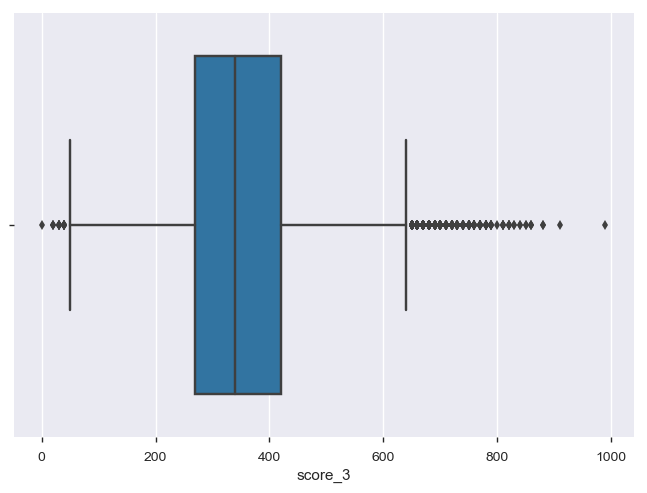

In [14]:
# Boxplot for Score_3
sns.boxplot('score_3', data=data)

(array([  1.00000000e+00,   9.00000000e+00,   7.00000000e+00,
          4.50000000e+01,   1.32000000e+02,   1.25000000e+02,
          4.51000000e+02,   7.60000000e+02,   5.87000000e+02,
          1.45500000e+03,   2.27700000e+03,   1.38100000e+03,
          3.38900000e+03,   4.33600000e+03,   2.50000000e+03,
          5.44000000e+03,   6.23300000e+03,   3.27000000e+03,
          7.05400000e+03,   3.55100000e+03,   7.14900000e+03,
          6.95800000e+03,   3.35300000e+03,   6.34100000e+03,
          5.81800000e+03,   2.66300000e+03,   4.71000000e+03,
          4.17700000e+03,   1.72700000e+03,   3.00100000e+03,
          2.42700000e+03,   1.00100000e+03,   1.66400000e+03,
          1.29100000e+03,   4.76000000e+02,   7.85000000e+02,
          5.56000000e+02,   2.55000000e+02,   3.46000000e+02,
          1.23000000e+02,   1.86000000e+02,   1.29000000e+02,
          4.80000000e+01,   7.00000000e+01,   5.50000000e+01,
          2.40000000e+01,   2.40000000e+01,   1.50000000e+01,
        

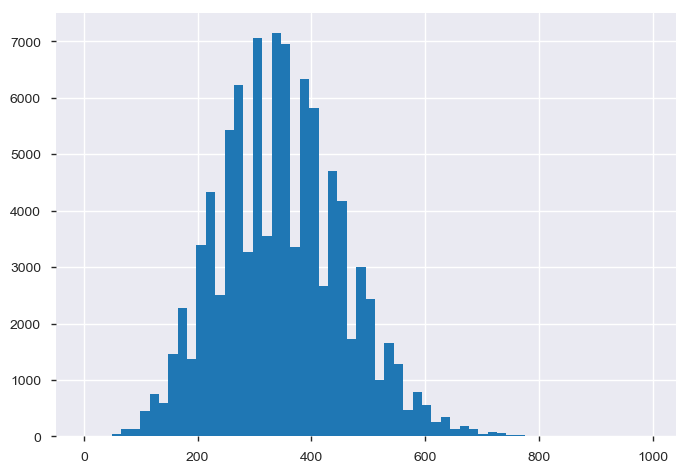

In [15]:
# Histogram for Score_3
plt.hist(data.score_3.dropna(), bins = 60)

In [16]:
# Evalute the max value 990
data[data.score_3 == 990]


,ids,default,score_1,score_2,score_3,score_4,score_5,score_6,risk_rate,amount_borrowed,...,state,zip,channel,job_name,real_state,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues
61069,765a908c-7cfd-76f1-d3cb-b53a4cfda894,False,1Rk8w4Ucd5yR3KcqZzLdow==,dCm9hFKfdRm7ej3jW+gyxw==,990.0,98.90452,0.041408,131.506629,0.38,10019.9,...,xsd3ZdsI3356I3xMxZeiqQ==,vjsYtmgFNg/8e4C3S58AiA==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,NaN,0.0,0.0,10.0,10.0


**Outlier**

Evaluating this type of variable is harder as it is a "score", which is generated by models so no interpretability. 
Our approach is by comparing with other variables values and nothing stands out.

**I've decided not to drop this observation**, because we don't have a lot of data and it doesn't seem to affect the other variables.

There are **1.193 / 1,2% missing values in score_3**. 

****
<div class="span5 alert alert-info">
<font color=black>
**How we will handle missing values**

Taking into consideration the influence in the algorithim and that deletion should be the last alternatively.
> The choice of method to impute missing values, largely influences the model’s predictive ability. In most statistical analysis
> methods, listwise deletion is the default method used to impute missing values. But, it not as good since it leads to
> information loss.[https://www.analyticsvidhya.com/blog/2016/03/tutorial-powerful-packages-imputing-missing-values/]

Looking for the adequate technique from multiple alternatives, we will induviadually asses the variables and decide between single imputation or multiple imputation. The reason not to just do single imputation, as it would be the easist is this drawbacks.
>Mean imputation reduces the variance of the imputed variables.
>Mean imputation shrinks standard errors, which invalidates most hypothesis tests and the calculation of confidence interval.
>Mean imputation does not preserve relationships between variables such as correlations.on this case will use a more standart >method of using the median of variable.[https://blogs.sas.com/content/iml/2017/12/06/problems-mean-imputation.html]

For the multiple imputation we will use Hmisc package in R as reccomended in this well explained article: https://www.analyticsvidhya.com/blog/2016/03/tutorial-powerful-packages-imputing-missing-values/.**</font>
</div>
****

In order to decide to do single or multiple imputation for each variable we will consider their: 

1. Distribuition shape
2. Distribuition density
3. Proportion of missing value

Violin plots are a good tool for us in this case.

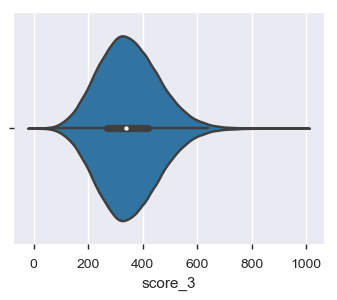

In [17]:
# Violin plot for Score_3
plt.figure(figsize=(4,3))
sns.violinplot('score_3', data=data)

As it is a normal distribuition with high density in the mean and the missing values correspond to only 1.2% we will do single imputation.

In [18]:
data.score_3 = data.score_3.fillna(value=np.mean(data.score_3))

##### 6.2.2.2 Score_4:

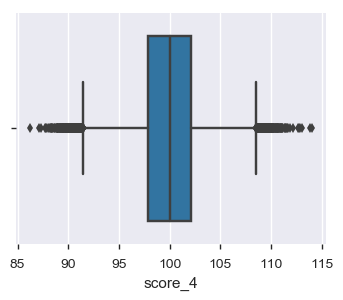

In [19]:
# Boxplot for Score_4
plt.figure(figsize=(4,3))
sns.boxplot('score_4', data=data)

(array([  2.80000000e+01,   4.29000000e+02,   3.77400000e+03,
          1.54450000e+04,   3.12350000e+04,   3.06080000e+04,
          1.43140000e+04,   3.38500000e+03,   3.58000000e+02,
          1.60000000e+01]),
 array([  86.1915723 ,   88.9702385 ,   91.74890469,   94.52757089,
          97.30623708,  100.08490327,  102.86356947,  105.64223566,
         108.42090186,  111.19956805,  113.97823424]),
 <a list of 10 Patch objects>)

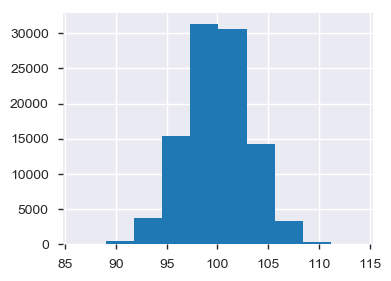

In [20]:
# Histogram for Score_4
plt.figure(figsize=(4,3))
plt.hist(data.score_4)

This is also a "score", so as stated prevously we can´t interpret the meaning of the values.
Normal distribuition and no outlaiers or missing values. No changes made!

##### 6.2.2.3 Score_5:

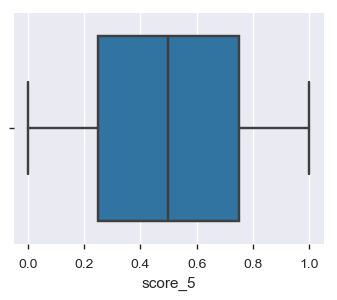

In [21]:
# Boxplot for score_5
plt.figure(figsize=(4,3))
sns.boxplot('score_5', data=data)

(array([ 505.,  495.,  483.,  522.,  500.,  493.,  518.,  531.,  528.,
         518.,  472.,  490.,  511.,  499.,  486.,  483.,  520.,  495.,
         509.,  470.,  505.,  533.,  462.,  498.,  491.,  518.,  466.,
         509.,  493.,  499.,  508.,  473.,  496.,  513.,  494.,  521.,
         461.,  504.,  463.,  495.,  502.,  487.,  507.,  505.,  496.,
         480.,  504.,  467.,  497.,  476.,  549.,  510.,  493.,  486.,
         516.,  506.,  533.,  532.,  523.,  465.,  488.,  485.,  492.,
         511.,  514.,  549.,  490.,  467.,  482.,  496.,  488.,  496.,
         482.,  522.,  519.,  489.,  493.,  493.,  535.,  495.,  495.,
         495.,  513.,  472.,  492.,  505.,  484.,  509.,  520.,  508.,
         484.,  470.,  506.,  479.,  515.,  540.,  510.,  503.,  538.,
         451.,  490.,  487.,  514.,  535.,  510.,  512.,  480.,  513.,
         506.,  481.,  495.,  515.,  488.,  506.,  479.,  453.,  484.,
         537.,  510.,  493.,  515.,  518.,  481.,  498.,  491.,  551.,
      

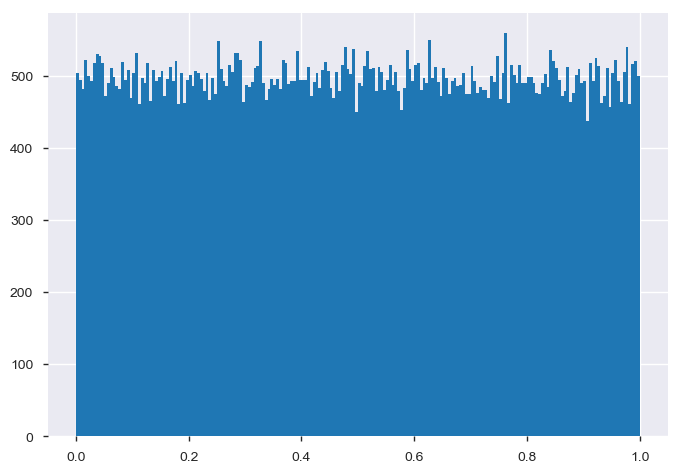

In [22]:
# Histogram for Score_5
plt.hist(data.score_5, bins=200)

For score_5 we don't see any outliers or missing values, the min and max values are 0 and 1, respectively. By increasing the number of bins in the histogram its possible to see a multimodal distribuition, for this study the important thing is that this distribution is not normal. As this is also a "score" variable we can´t interpret the meaning.

##### 6.2.2.4 Score_6:

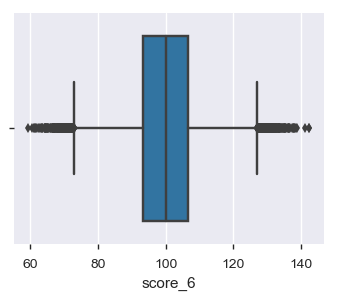

In [23]:
# Boxplot for Score_6
plt.figure(figsize=(4,3))
sns.boxplot('score_6', data=data)

(array([    61.,    753.,   4990.,  16919.,  30485.,  28460.,  13746.,
          3678.,    464.,     36.]),
 array([  59.25093743,   67.56885058,   75.88676372,   84.20467687,
          92.52259001,  100.84050316,  109.15841631,  117.47632945,
         125.7942426 ,  134.11215574,  142.43006889]),
 <a list of 10 Patch objects>)

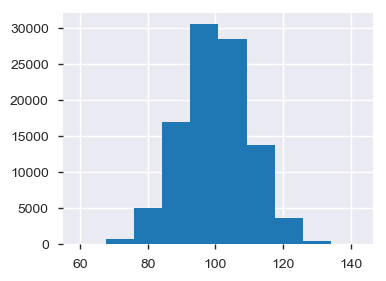

In [24]:
# Histogram for Score_6
plt.figure(figsize=(4,3))
plt.hist(data.score_6)

As seen previosly, it is a "score" variable. Normal distribuition and no outlaiers or missing values. Check!

##### 6.2.2.5 Risk Rate:

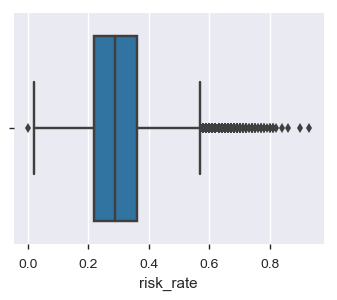

In [25]:
# Boxplot for Risk rate
plt.figure(figsize=(4,3))
sns.boxplot('risk_rate', data=data)

(array([  1.00000000e+00,   1.70000000e+01,   3.10000000e+01,
          1.54000000e+02,   1.60000000e+02,   5.44000000e+02,
          4.57000000e+02,   1.40300000e+03,   1.06600000e+03,
          2.71900000e+03,   3.84400000e+03,   2.29600000e+03,
          5.69300000e+03,   3.24300000e+03,   6.97500000e+03,
          3.70100000e+03,   7.70200000e+03,   3.94100000e+03,
          7.83800000e+03,   7.36800000e+03,   3.62300000e+03,
          6.60500000e+03,   3.10000000e+03,   5.28200000e+03,
          2.39400000e+03,   4.13000000e+03,   1.78900000e+03,
          3.00700000e+03,   1.30800000e+03,   2.09200000e+03,
          1.62700000e+03,   6.30000000e+02,   1.05100000e+03,
          4.10000000e+02,   6.45000000e+02,   2.37000000e+02,
          4.26000000e+02,   1.70000000e+02,   2.39000000e+02,
          1.66000000e+02,   6.50000000e+01,   8.30000000e+01,
          3.40000000e+01,   5.00000000e+01,   1.60000000e+01,
          2.10000000e+01,   9.00000000e+00,   1.10000000e+01,
        

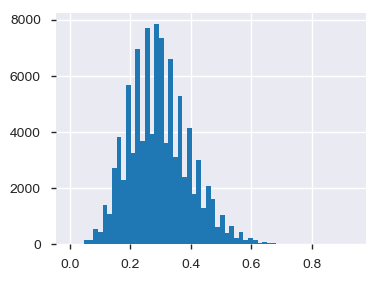

In [26]:
# Histogram of Risk rate
plt.figure(figsize=(4,3))
plt.hist(data.risk_rate.dropna(), bins = 60)

In risk rate we see a normal distribuition, no outliers and 1193 / 1.2 % missing data.

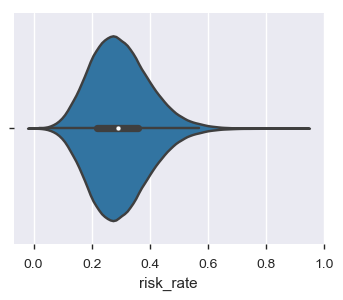

In [27]:
# Violin plot of risk rate
plt.figure(figsize=(4,3))
sns.violinplot('risk_rate', data=data)

As it is a normal distribuition with high density in the mean and the missing values correspond to only 1.2% we will do single imputation.

In [28]:
data.risk_rate = data.risk_rate.fillna(value=np.mean(data.risk_rate))

##### 6.2.2.6 Amount Borrowed:

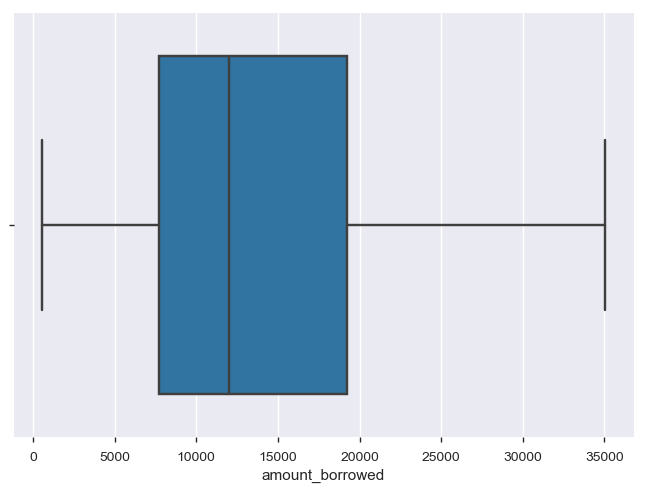

In [29]:
# Boxplot for Amount borrowed
sns.boxplot('amount_borrowed', data=data)

(array([  6797.,  16937.,  20022.,  13229.,  12538.,  12225.,   5436.,
          5053.,   2436.,   3726.]),
 array([   527.07 ,   3980.354,   7433.638,  10886.922,  14340.206,
         17793.49 ,  21246.774,  24700.058,  28153.342,  31606.626,
         35059.91 ]),
 <a list of 10 Patch objects>)

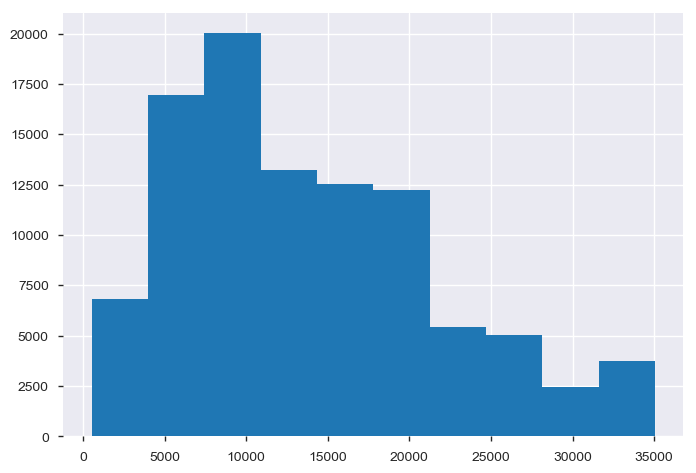

In [30]:
# Histogram for Amount Borrowed
plt.hist(data.amount_borrowed.dropna())

In amount_borrowed we see a skewed distribuition, no outliers and 1193 / 1.2 % missing data. 
In this case it´s riskier to assume the mean as the value for the missing data, so we will use Hmisc that allows mean imputation using additive regression, bootstrapping, and predictive mean matching. (This will be performed in the R notebook)

##### 6.2.2.7 Borrowed in months:

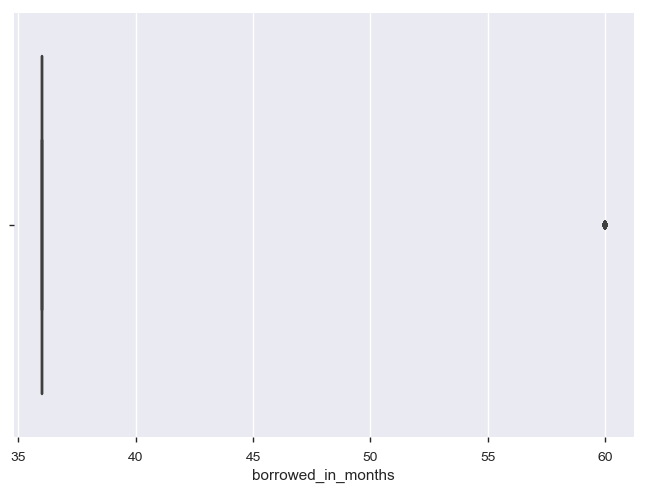

In [31]:
# Boxplot for Borrowed in months
sns.boxplot('borrowed_in_months', data=data)

(array([ 74484.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,  23915.]),
 array([ 36. ,  38.4,  40.8,  43.2,  45.6,  48. ,  50.4,  52.8,  55.2,
         57.6,  60. ]),
 <a list of 10 Patch objects>)

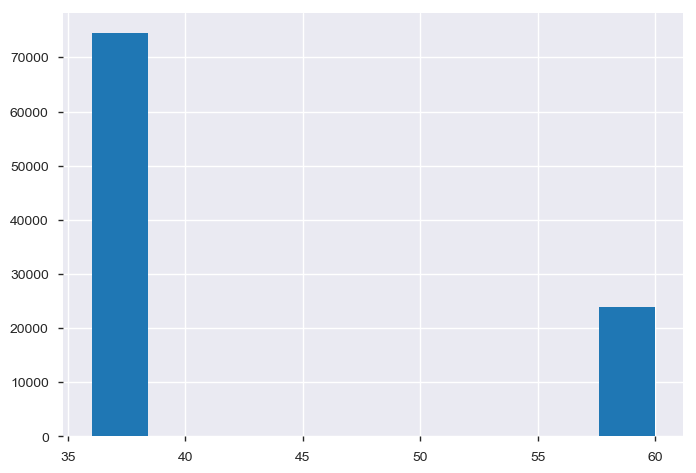

In [32]:
# Histogram of Borrowed in months
plt.hist(data.borrowed_in_months.dropna())

In [33]:
# Check how many different values in Borrowed in months
data.borrowed_in_months.value_counts()

36.0    74484
60.0    23915
Name: borrowed_in_months, dtype: int64

When looking into the borrowed in months variable we see that there are only two values 36 and 60, probably due to the type of financial product. Which means that this is not a continuos variable. So, in order to perform the prediction we will convert to a categorical variable.
There are 1193 / 1.2 % missing data that we will impute with Hmisc that allows mean imputation using additive regression, bootstrapping, and predictive mean matching. (This will be performed in the R notebook)

In [34]:
data['borrowed_in_months'] = data['borrowed_in_months'].astype('category')

##### 6.2.2.8 Credit limit:

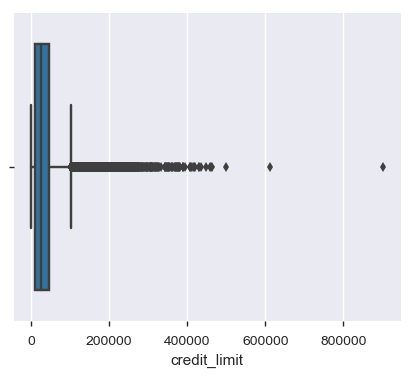

In [35]:
# Boxplot for credit limit
plt.figure(figsize=(5,4))
sns.boxplot('credit_limit', data=data)

(array([  6.46830000e+04,   3.89100000e+03,   4.69000000e+02,
          8.50000000e+01,   2.90000000e+01,   4.00000000e+00,
          1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00]),
 array([      0. ,   90250.4,  180500.8,  270751.2,  361001.6,  451252. ,
         541502.4,  631752.8,  722003.2,  812253.6,  902504. ]),
 <a list of 10 Patch objects>)

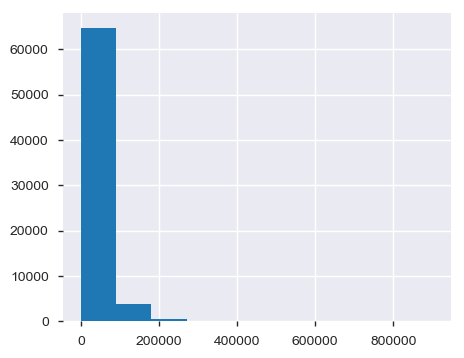

In [36]:
# Histogram for Credit limit
plt.figure(figsize=(5,4))
plt.hist(data.credit_limit.dropna())

(array([  1.16950000e+04,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          2.00000000e+00,   4.00000000e+00,   1.10000000e+01,
          2.20000000e+01,   6.20000000e+01,   1.35000000e+02,
          2.35000000e+02,   4.53000000e+02,   9.09000000e+02,
          1.63000000e+03,   3.27000000e+03,   5.01800000e+03,
          8.14300000e+03,   1.05910000e+04,   1.03900000e+04,
          8.19900000e+03,   4.96800000e+03,   2.18500000e+03,
          8.82000000e+02,   2.78000000e+02,   7.30000000e+01,
        

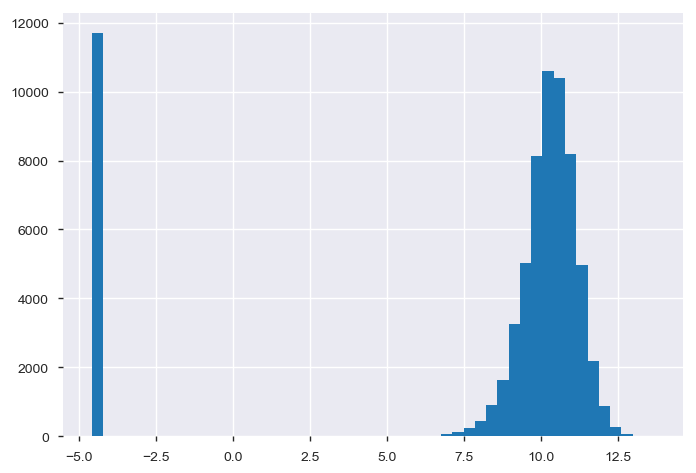

In [37]:
# Histogram for Credit limit, but taking the logarithm
a = data.credit_limit
a = a.dropna()
a = a.replace(0, 0.01) # we had to replace the zeros to small values to take the log
a = np.log(a)
plt.hist(a, bins = 50)

In the above histogram, we took the logarithm of the credit limit. The purpose of taking the log was to minimize the big range of the variable, also known as normalize. Now we notice a normal distribuition that it was not obvious without making the transformation.
**We should add a feature of log to this variable.**

Regarding the 30429 / 30.6 % missing values we will impute with Hmisc that allows mean imputation using additive regression, bootstrapping, and predictive mean matching. (This will be performed in the R notebook)

In [38]:
data['credit_limit_log'] = np.log(data.credit_limit.replace(0, 0.01))

##### 6.2.2.9 Income:

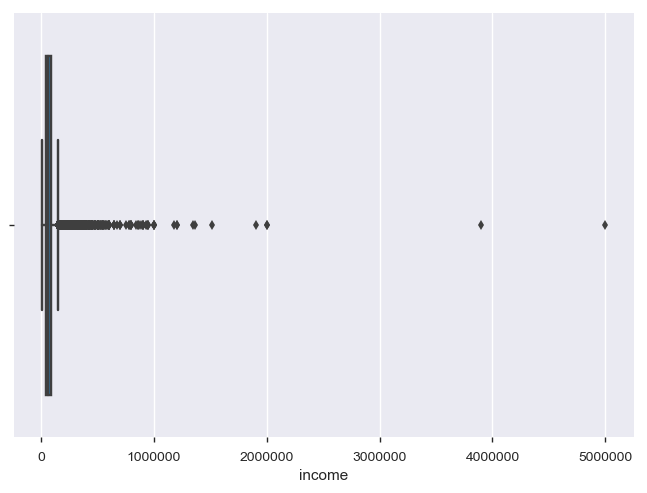

In [39]:
# Boxplot in Income
sns.boxplot('income', data=data)

(array([  9.83240000e+04,   6.40000000e+01,   5.00000000e+00,
          4.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          1.00000000e+00]),
 array([  4.81409000e+03,   5.04335464e+05,   1.00385684e+06,
          1.50337821e+06,   2.00289959e+06,   2.50242096e+06,
          3.00194233e+06,   3.50146371e+06,   4.00098508e+06,
          4.50050646e+06,   5.00002783e+06]),
 <a list of 10 Patch objects>)

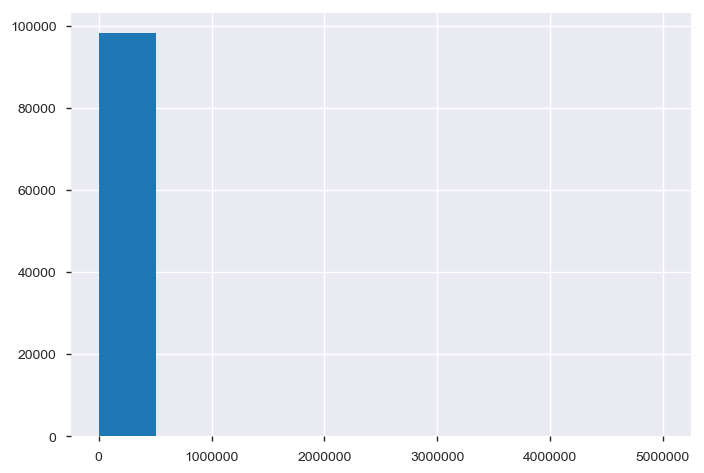

In [40]:
# Histogram of Income
plt.hist(data.income.dropna())

In [41]:
# Checking outliers observations
data[data.income > 3000000]

,ids,default,score_1,score_2,score_3,score_4,score_5,score_6,risk_rate,amount_borrowed,...,zip,channel,job_name,real_state,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,credit_limit_log
63593,805c584c-ba54-7d1e-6249-0208f47756c3,False,1Rk8w4Ucd5yR3KcqZzLdow==,rJZgTmANW3PjOCQLCcp4iQ==,170.0,104.338560,0.161395,96.785556,0.3,35010.97,...,8REhu8TWlarYwZKjbn1BNA==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,12.0,0.0,0.0,13.0,13.0,11.163255
81072,1c4ed732-f653-8f35-8644-68dd58743f1c,NaN,DGCQep2AE5QRkNCshIAlFQ==,osCzpM4hJrxugqWWuZmMWw==,210.0,102.361398,0.787562,102.643090,0.3,25018.53,...,NRPjmoqlw9IryY0gowWBKA==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGPeS...,N5/CE7lSkAfB04hVFFwllw==,NaN,0.0,0.0,12.0,NaN,NaN


There are 2 outliers that affect the variable so we will drop both observations.

In [42]:
# Drop outliers rows
outliers = data[data.income > 3000000]
data = data.drop(outliers.index)
len(data)

99590

There are 2 outliers that affect the variable so we will drop both observations.

(array([  3.50000000e+01,   6.54000000e+02,   5.39800000e+03,
          3.21090000e+04,   4.27770000e+04,   1.51190000e+04,
          2.00600000e+03,   2.48000000e+02,   4.20000000e+01,
          9.00000000e+00]),
 array([  8.47930231,   9.08223902,   9.68517572,  10.28811243,
         10.89104913,  11.49398584,  12.09692254,  12.69985925,
         13.30279595,  13.90573266,  14.50866936]),
 <a list of 10 Patch objects>)

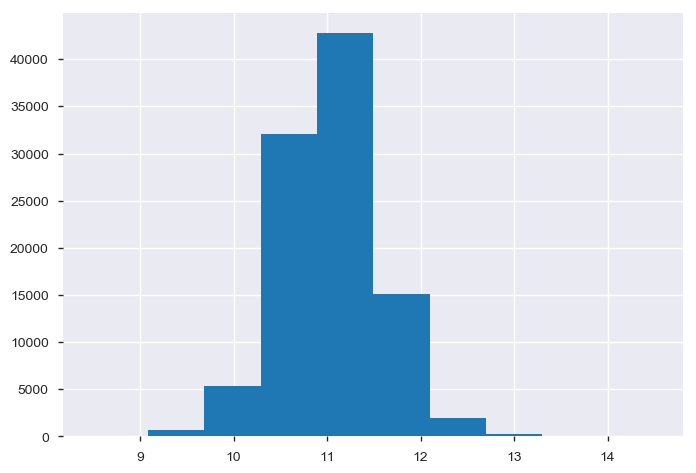

In [43]:
# Histogram for Income, but taking the logarithm
a = data.income
a = a.dropna()
a = np.log(a)
plt.hist(a)

In the above histogram, we took the logarithm of income. The purpose of taking the log was to normalize. Now we notice a normal distribuition that it was not obvious without making the transformation.
**We should add a feature of log to this variable.**

Regarding the 1193 / 1.2 % missing values we will impute with Hmisc that allows mean imputation using additive regression, bootstrapping, and predictive mean matching. (This will be performed in the R notebook)

In [44]:
data['income_log'] = np.log(data.income)

##### 6.2.2.10 Ok_since:

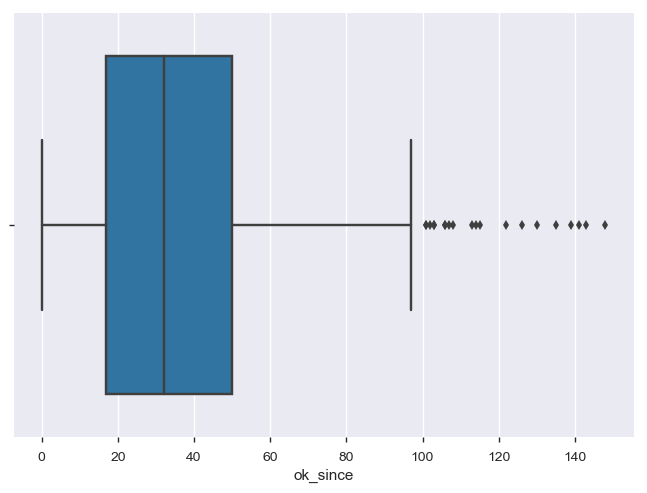

In [45]:
# Boxplot of Ok_since
sns.boxplot('ok_since', data=data)

(array([  8.45500000e+03,   1.02980000e+04,   9.06300000e+03,
          6.11300000e+03,   4.52600000e+03,   2.43500000e+03,
          1.50000000e+01,   7.00000000e+00,   3.00000000e+00,
          5.00000000e+00]),
 array([   0. ,   14.8,   29.6,   44.4,   59.2,   74. ,   88.8,  103.6,
         118.4,  133.2,  148. ]),
 <a list of 10 Patch objects>)

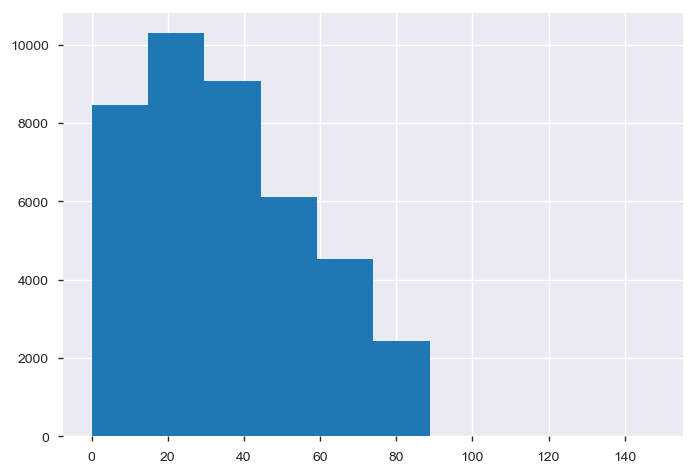

In [46]:
# Histogram of Ok_since
plt.hist(data.ok_since.dropna())

The Ok_since variable has a skewed distribuition, no outliers and 58.671 / 58.9 % of missing data. 
Due to the high proportion  and skewed distribuition of missing data we won´t do imputation.

##### 6.2.2.11 N_bankruptcies:

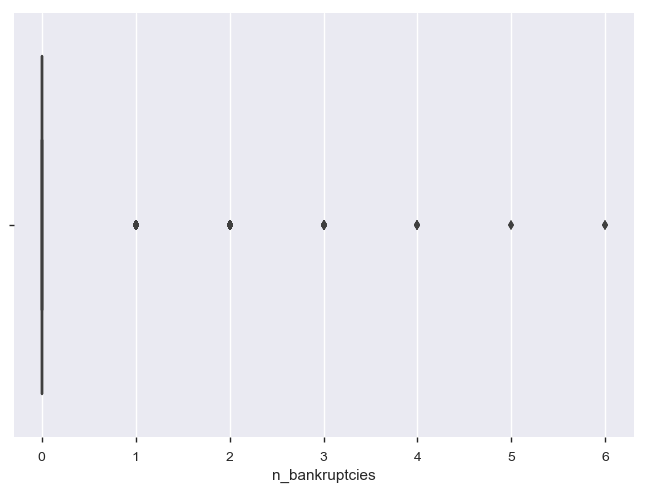

In [47]:
# Boxplot for N_bankruptices
sns.boxplot('n_bankruptcies', data=data)

(array([  9.06740000e+04,   7.26800000e+03,   0.00000000e+00,
          1.20000000e+02,   0.00000000e+00,   1.70000000e+01,
          6.00000000e+00,   0.00000000e+00,   2.00000000e+00,
          3.00000000e+00]),
 array([ 0. ,  0.6,  1.2,  1.8,  2.4,  3. ,  3.6,  4.2,  4.8,  5.4,  6. ]),
 <a list of 10 Patch objects>)

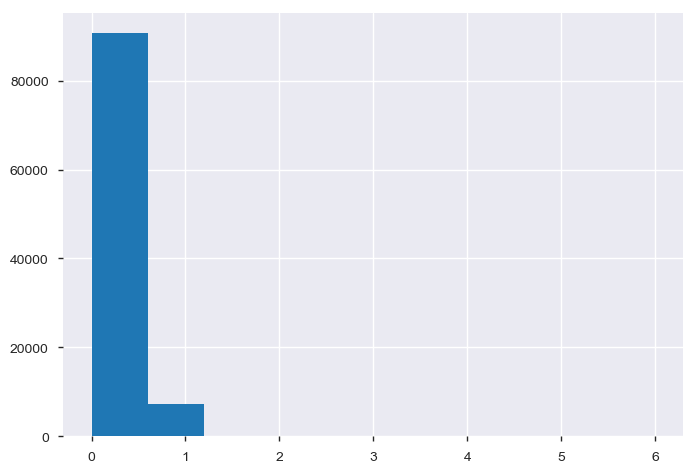

In [48]:
# Histogram of N_bankruptices
plt.hist(data.n_bankruptcies.dropna())

In [49]:
# Checking how many unique values
data.n_bankruptcies.value_counts()

0.0    90674
1.0     7268
2.0      120
3.0       17
4.0        6
6.0        3
5.0        2
Name: n_bankruptcies, dtype: int64

This is a discrete variable, so we can decide whether to treat it as a continuous predictor (covariate) or categorical predictor (factor). As it only have 7 levels we will treat as categorical variable, a distinct response value is fit to each level of the variable without regard to the order of the predictor levels. 
There are 1500 / 1.5% of missing data that we will impute with Hmisc that allows mean imputation using additive regression, bootstrapping, and predictive mean matching. (This will be performed in the R notebook)

In [50]:
data['n_bankruptcies'] = data['n_bankruptcies'].astype('category')

##### 6.2.2.12 N_defaulted loans:

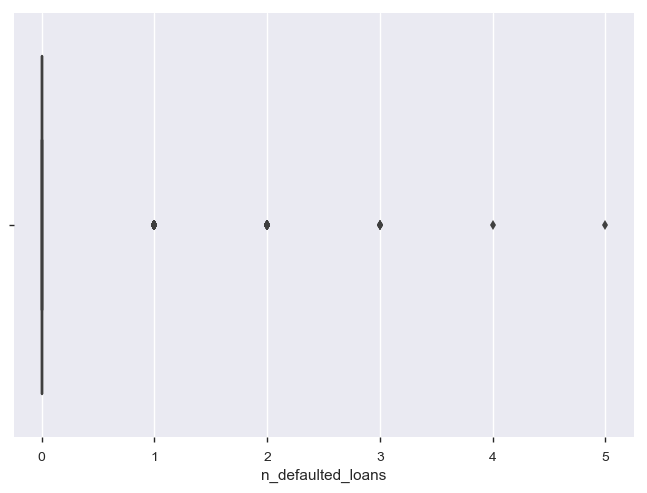

In [51]:
# Boxplot on N_defaulted_loans
sns.boxplot('n_defaulted_loans', data=data)

(array([  9.79850000e+04,   0.00000000e+00,   3.43000000e+02,
          0.00000000e+00,   3.80000000e+01,   0.00000000e+00,
          5.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          1.00000000e+00]),
 array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ]),
 <a list of 10 Patch objects>)

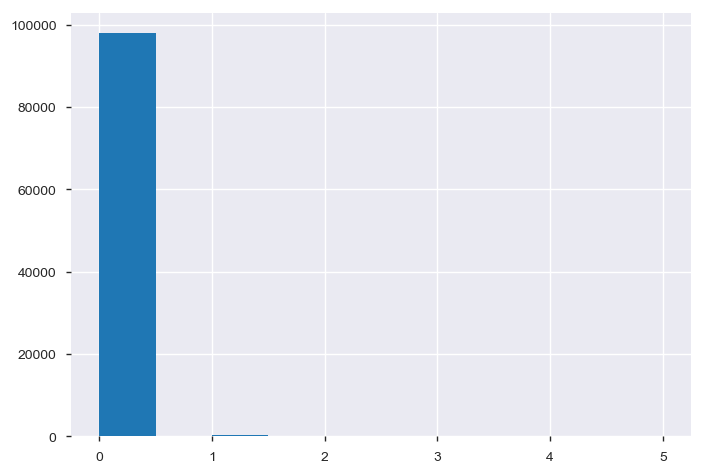

In [52]:
# Histogram on N_defaulted_loans
plt.hist(data.n_defaulted_loans.dropna())

In [53]:
# Checking the count per value
data.n_defaulted_loans.value_counts()

0.0    97985
1.0      343
2.0       38
3.0        5
5.0        1
4.0        1
Name: n_defaulted_loans, dtype: int64

This is a discrete variable, so we will convert to categorical as it only have 5 levels.
There are 1217 / 1.2% of missing data that we will impute with Hmisc that allows mean imputation using additive regression, bootstrapping, and predictive mean matching. (This will be performed in the R notebook)
When looking into the n_defaulted_loans variable we see that there are only 5 values, so it is a discrete variable. So, we will convert to a categorical variable.

In [54]:
data['n_defaulted_loans'] = data['n_defaulted_loans'].astype('category')

##### 6.2.2.12 N_accounts:

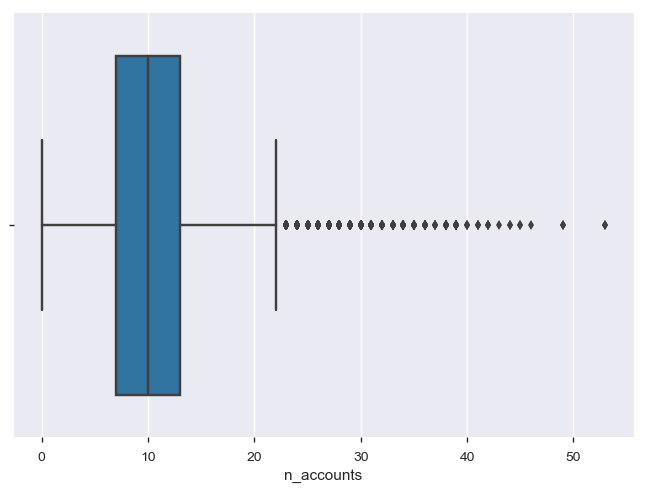

In [55]:
# Boxplot on N_accounts
sns.boxplot('n_accounts', data=data)

(array([  9.95300000e+03,   4.38140000e+04,   3.07450000e+04,
          1.14200000e+04,   2.05800000e+03,   2.97000000e+02,
          7.20000000e+01,   2.80000000e+01,   6.00000000e+00,
          4.00000000e+00]),
 array([  0. ,   5.3,  10.6,  15.9,  21.2,  26.5,  31.8,  37.1,  42.4,
         47.7,  53. ]),
 <a list of 10 Patch objects>)

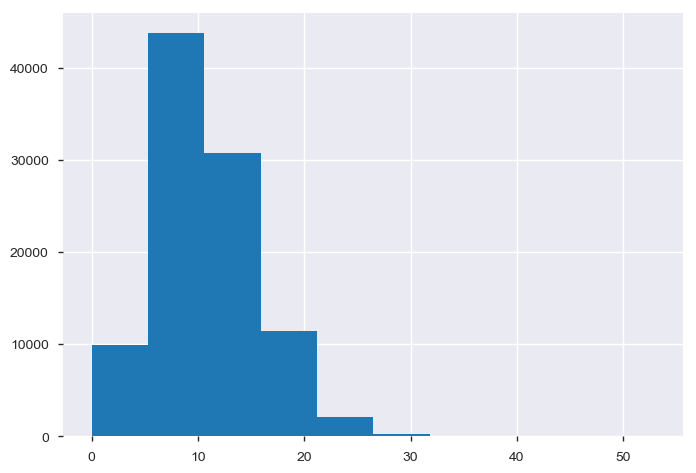

In [56]:
# Histogram on N_accounts
plt.hist(data.n_accounts.dropna())

In [57]:
# Checking the count per value
len(data.n_accounts.value_counts())

49

This is a discrete variable, that we will treat as a continuous predictor due to the high amount of levels.
There are 1193 / 1.2% of missing data that we will impute with Hmisc that allows mean imputation using additive regression, bootstrapping, and predictive mean matching. (This will be performed in the R notebook)

##### 6.2.2.13 N_issues:

As reported in the pandas profiling report this variable N_issues has a high correlation with N_bankruptices, so it has been rejected and we will drop from the data set.

In [58]:
data = data.drop(['n_issues'], axis=1)

### 6.2.2 Object variables:

List:
* score_1               98399 non-null object
* score_2               98399 non-null object
* reason                98390 non-null object
* sign                  67391 non-null object
* gender                88593 non-null object
* facebook_profile      89610 non-null object
* last_payment          98285 non-null object
* end_last_loan         98395 non-null object
* state                 98399 non-null object
* zip                   98399 non-null object
* channel               98399 non-null object
* job_name              92286 non-null object
* real_state            98399 non-null object

#### 6.2.2.1 Score_1:

In [59]:
# Checking the levels
data.score_1.value_counts()

DGCQep2AE5QRkNCshIAlFQ==    32293
1Rk8w4Ucd5yR3KcqZzLdow==    25056
4DLlLW62jReXaqbPaHp1vQ==    16552
8k8UDR4Yx0qasAjkGrUZLw==    14352
e4NYDor1NOw6XKGE60AWFw==     6613
smzX0nxh5QlePvtVf6EAeg==     2902
fyrlulOiZ+5hoFqLa6UbDQ==      629
Name: score_1, dtype: int64

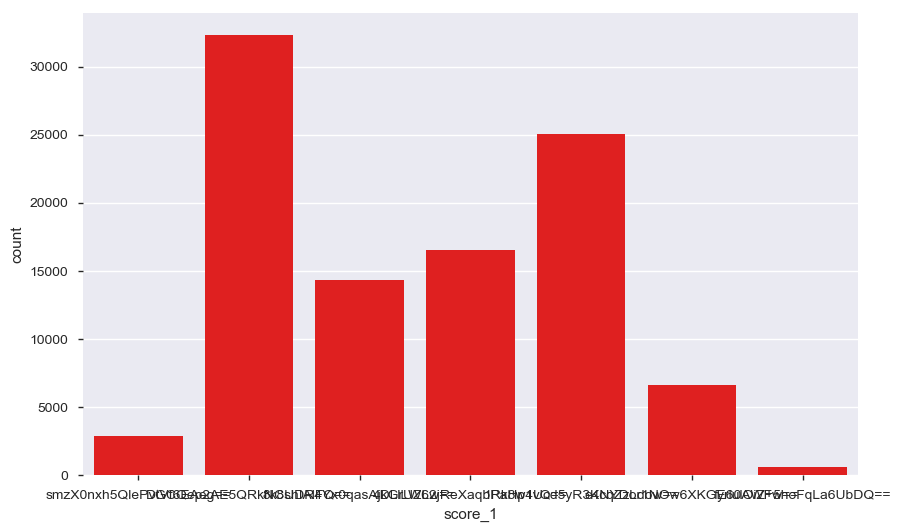

In [60]:
# Countplot per level
plt.figure(figsize=(10,6))
sns.countplot(x='score_1', data= data, color='r')

We will convert to categorical as it only have 7 levels. 
There are 1193 / 1.2% of missing data that we will impute with Hmisc that allows mean imputation using additive regression, bootstrapping, and predictive mean matching. (This will be performed in the R notebook)

In [61]:
data['score_1'] = data['score_1'].astype('category')

#### 6.2.2.2 Score_2:

In [62]:
# Counting the levels
len(data.score_2.value_counts())

35

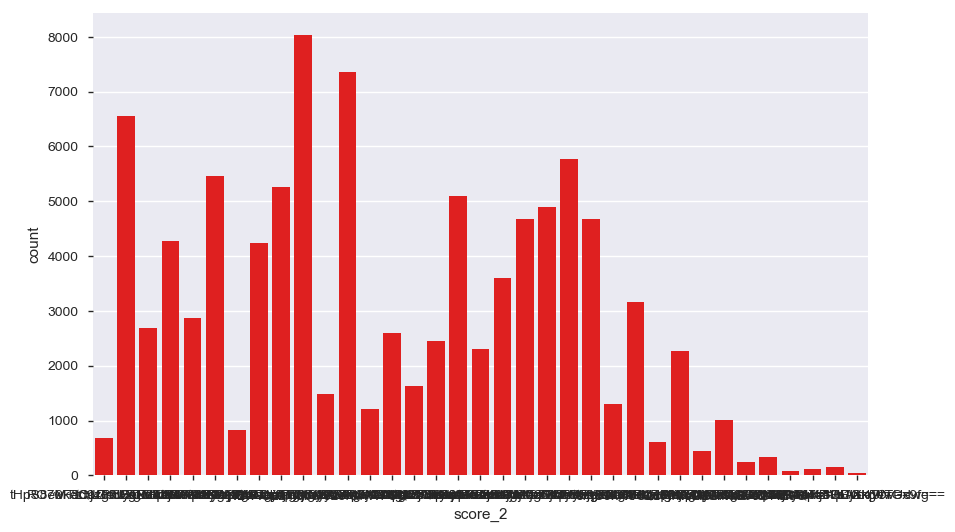

In [63]:
# Countplot per level
plt.figure(figsize=(10,6))
sns.countplot(x='score_2', data= data, color='r')

We will convert to categorical, but as it has a lot of levels we will bin them together. Being a "score" variable does not give many options on how to group. So we will group the levels with low count together.

There are 1193 / 1.2% of missing data that we will impute with Hmisc that allows mean imputation using additive regression, bootstrapping, and predictive mean matching. (This will be performed in the R notebook)

In [64]:
data.score_2.value_counts(ascending=True)

5/uMrqKj3OL/Xk5OrGx9fg==      45
dWJRASUFMejk3AHZ1p1Gkg==      73
55UK234RR1d7HIWJjmq9tw==     110
+2hzpeP1RWr8PEvL1WTUdw==     159
wjdj2vxjWoDsEIk0l09ynw==     242
6J1ZMTzN5GKHXnhM4J1JbA==     338
O4i7FxcROACMVTCgI0WXuA==     442
vJyc9xom9v7hwFMPTIpmKw==     611
tHpS8e9F8d9zg3iOQM9tsA==     680
bopP0NxW3+r8tn9xIHTaOw==     831
A+QuW1n/ABeiVVe/9CRZ9Q==    1005
cdpgyOyZS04uXerMNu7uCw==    1203
w1miZqhB5+RSamEQJa0rqg==    1301
NLvAOzzmJba/0zolQnWF5Q==    1475
ky19q4V1ZqgL3jnHX0wKDw==    1629
emS9xH8CLoRNie2uSmaDAQ==    2269
mX2VRRG38RPiHX+MfjefRw==    2305
YLGMUI9hObSh6wD/xfanGg==    2450
+CxEO4w7jv3QPI/BQbyqAA==    2592
wkeCdGeu5sEv4/fjwR0aDg==    2686
7h8PTkrlTWUPP3yuyP4rUg==    2878
OlDYtdljgSSYM/M1L2CRaQ==    3165
d/7Hedyz7ovK9Pn1CYN4+A==    3604
dCm9hFKfdRm7ej3jW+gyxw==    4235
tQUTfUyeuGkhRotd+6WjVg==    4277
pAzpxkhjPsjWldgSX21+zg==    4678
LCak332j+TYFqHC3NDwiqg==    4681
IOVu8au3ISbo6+zmfnYwMg==    4904
7h+tk4z7O9brtBSe1rNjxA==    5092
Fv28Bz0YRTVAT5kl1bAV6g==    5253
rJZgTmANW3

In [65]:
data.score_2 = data.score_2.replace('5/uMrqKj3OL/Xk5OrGx9fg==', 'below_1000')
data.score_2 = data.score_2.replace('dWJRASUFMejk3AHZ1p1Gkg==', 'below_1000')
data.score_2 = data.score_2.replace('55UK234RR1d7HIWJjmq9tw==', 'below_1000')
data.score_2 = data.score_2.replace('+2hzpeP1RWr8PEvL1WTUdw==', 'below_1000')
data.score_2 = data.score_2.replace('wjdj2vxjWoDsEIk0l09ynw==', 'below_1000')
data.score_2 = data.score_2.replace('6J1ZMTzN5GKHXnhM4J1JbA==', 'below_1000')
data.score_2 = data.score_2.replace('O4i7FxcROACMVTCgI0WXuA==', 'below_1000')
data.score_2 = data.score_2.replace('vJyc9xom9v7hwFMPTIpmKw==', 'below_1000')
data.score_2 = data.score_2.replace('tHpS8e9F8d9zg3iOQM9tsA==', 'below_1000')
data.score_2 = data.score_2.replace('bopP0NxW3+r8tn9xIHTaOw==', 'below_1000')
len(data.score_2.value_counts(ascending=True))

26

#### 6.2.2.3 Reason, Job_Name:

In [66]:
# Conting the levels
print(len(data.reason.value_counts()))
print(len(data.job_name.value_counts()))

29481
65670


With both of this variables we should perform some text analytics, but unfortunatelly this would increase the complexity of this project so we will drop the variable.

In [67]:
data = data.drop(['reason'], axis=1)
data = data.drop(['job_name'], axis=1)

#### 6.2.2.4 Sign, Gender, Facebook_profile, Real_state:

In [68]:
print(len(data.sign.value_counts()))
print(len(data.gender.value_counts()))
print(len(data.facebook_profile.value_counts()))
print(len(data.state.value_counts()))
print(len(data.zip.value_counts()))
print(len(data.channel.value_counts()))
print(len(data.real_state.value_counts()))

12
2
2
50
840
1
5


In [69]:
data['sign'] = data['sign'].astype('category')

In [70]:
data['gender'] = data['gender'].astype('category')

In [71]:
data['facebook_profile'] = data['facebook_profile'].astype('category')

In [72]:
data['real_state'] = data['real_state'].astype('category')

#### 6.2.2.5 Channel:

In [73]:
data.channel.value_counts()

NCqL3QBx0pscDnx3ixKwXg==    98397
Name: channel, dtype: int64

We will drop channel because it only has 1 category
And n_issues, because it is highly corretlated with n_accounts
We convert last_payment and end_last_loan to time, so we can perform some feature enginering

In [74]:
data = data.drop(['channel'], axis=1)

#### 6.2.2.6  Last_payment, End_last_loan:

In [75]:
print(len(data.last_payment.value_counts()))
print(len(data.end_last_loan.value_counts()))

110
112


In [76]:
data.last_payment = pd.to_datetime(data.last_payment, format='%Y/%m/%d')

In [77]:
data.end_last_loan = pd.to_datetime(data.end_last_loan, format='%Y/%m/%d')

Feature engineering:

In [78]:
data['delta_last'] = (data.last_payment.max()  - data.last_payment)
data['delta_loan'] = (data.end_last_loan.max()  - data.end_last_loan)

In [79]:
data.to_csv("data_capstone2.csv")